# Vector Arithmetic Using Generated Faces

## In this notebook I demonstrate the vector arithmetic properties of the learned representations of faces using a trained DCGAN

In [1]:
import tensorflow as tf
import numpy as np
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
import numpy as np
import PIL
from IPython import display
import tensorflow_datasets as tfds
import warnings
warnings.filterwarnings("ignore")

# Load Generator From Trained DCGAN 

In [2]:
Generator = tf.keras.models.load_model('Trained Models/celeb64_190/gen_weights/gen_model_epoch_0150.h5')

In [156]:
Generator.input

<tf.Tensor 'dense_6_input:0' shape=(None, 128) dtype=float32>

## Helper function for generating predictions

In [219]:
def predict_img (array):
    sample = array.numpy()
    sample = sample.reshape((1,128)) # Take latent vector, reshape for model input
    pred = Generator(sample) # Apply generator on latent vector
    pred = pred.numpy() #Convert to numpy 
    return pred #return

## Repeatedly generate faces to find latent representations that represent smiling women, neutral women and neutral men

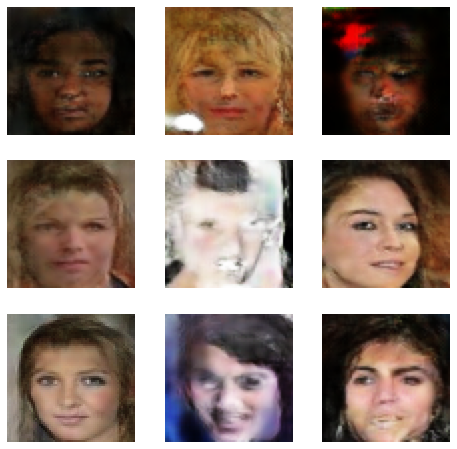

In [310]:
rand = tf.random.uniform([9, 128], minval=-1., maxval=1.) #Generate random uniform latent vector
predictions = Generator(rand) # generate image from random latent vectors
predictions = predictions.numpy()
fig = plt.figure(figsize=(8, 8))

for i in range(predictions.shape[0]): # display images
    plt.subplot(3, 3, i + 1)
    plt.imshow((predictions[i, :, :, :] * 127.5 + 127.5).astype(np.uint8)) # need to recast to RGB range for imshow
    plt.axis('off')

## Gather grouped images into arrays

In [285]:
smiling_women_array = []

In [307]:
smiling_women_array.append(rand[5])

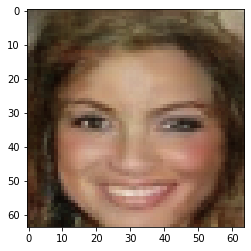

In [311]:
avg_smiling_woman_array = np.zeros(128)
for each in smiling_women_array:
    avg_smiling_woman_array += each.numpy()
avg_smiling_woman_array = avg_smiling_woman_array / len(smiling_women_array)

avg_smiling_woman_array = avg_smiling_woman_array.reshape((1,128))
predictions = Generator(avg_smiling_woman_array)
predictions = predictions.numpy()
plt.imshow((predictions[0, :, :, :] * 127.5 + 127.5).astype(np.uint8))

# Average Grouped Images

In [90]:
avg_smile_woman = smiling_woman + smiling_woman_2 +  smiling_woman_3
avg_smile_woman = avg_smile_woman /3

# Average Smiling Woman

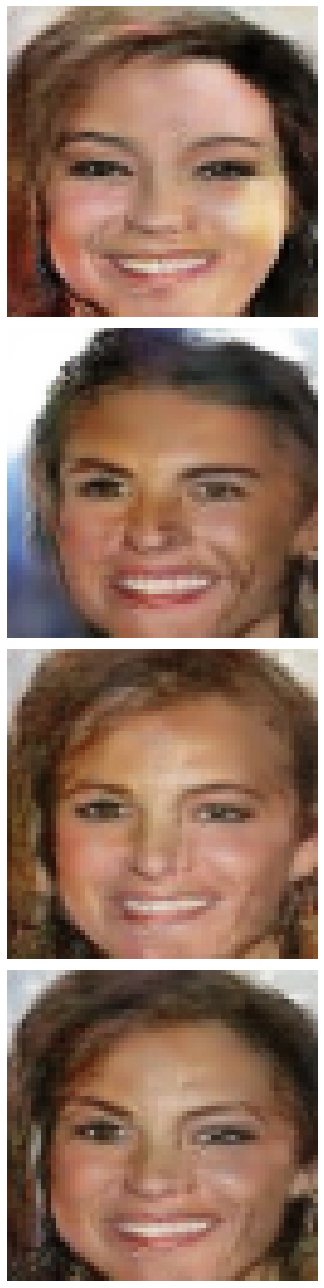

In [230]:
fig = plt.figure(figsize=(24, 18))

plt.subplot(4, 1, 1)
plt.imshow((predict_img(smiling_woman)[0, :, :, :] * 127.5 + 127.5).astype(np.uint8))
plt.axis('off')
plt.subplot(4, 1, 2)#5)
plt.imshow((predict_img(smiling_woman_2)[0, :, :, :] * 127.5 + 127.5).astype(np.uint8))
plt.axis('off')
plt.subplot(4, 1, 3)#9)
plt.imshow((predict_img(smiling_woman_3)[0, :, :, :] * 127.5 + 127.5).astype(np.uint8))
plt.axis('off')
plt.subplot(4, 1, 4)#13)
plt.imshow((predict_img(avg_smile_woman)[0, :, :, :] * 127.5 + 127.5).astype(np.uint8))
plt.axis('off')
fig.tight_layout()
fig.savefig('average_smiling_woman.png')

# Average Neutral Woman

In [133]:
avg_not_smile_woman = not_smiling_woman_3 + not_smiling_woman_2 + not_smiling_woman
avg_not_smile_woman = avg_not_smile_woman /3

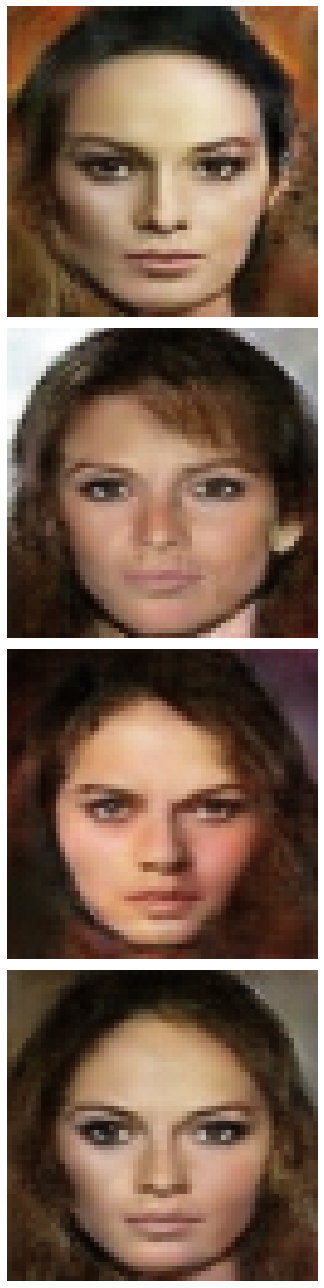

In [231]:
fig = plt.figure(figsize=(24, 18))

plt.subplot(4, 1, 1)
plt.imshow((predict_img(not_smiling_woman)[0, :, :, :] * 127.5 + 127.5).astype(np.uint8))
plt.axis('off')
plt.subplot(4, 1, 2)#5)
plt.imshow((predict_img(not_smiling_woman_2)[0, :, :, :] * 127.5 + 127.5).astype(np.uint8))
plt.axis('off')
plt.subplot(4, 1, 3)#9)
plt.imshow((predict_img(not_smiling_woman_3)[0, :, :, :] * 127.5 + 127.5).astype(np.uint8))
plt.axis('off')
plt.subplot(4, 1, 4)#13)
plt.imshow((predict_img(avg_not_smile_woman)[0, :, :, :] * 127.5 + 127.5).astype(np.uint8))
plt.axis('off')
fig.tight_layout()
fig.savefig('average_neutral_woman.png')

# Average Smiling Man

In [131]:
avg_smile_man = smiling_man + smiling_man_2 +  smiling_man_3
avg_smile_man = avg_smile_man /3

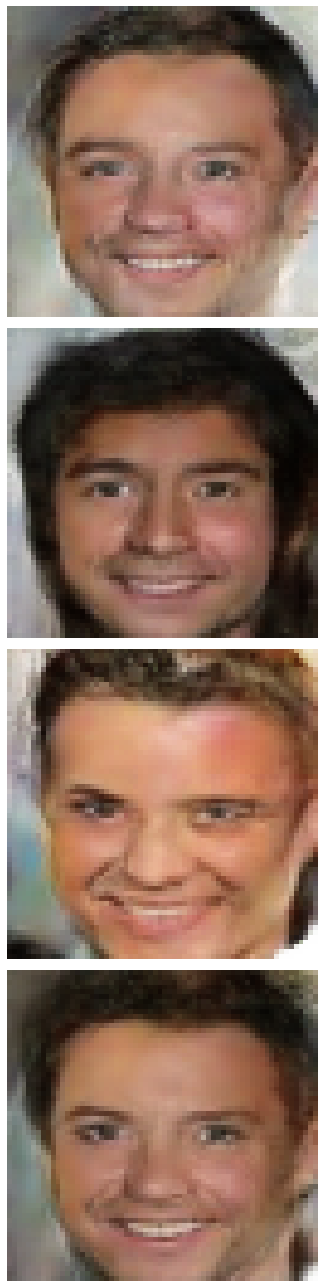

In [232]:
fig = plt.figure(figsize=(24, 18))

plt.subplot(4, 1, 1)
plt.imshow((predict_img(smiling_man)[0, :, :, :] * 127.5 + 127.5).astype(np.uint8))
plt.axis('off')
plt.subplot(4, 1, 2)#5)
plt.imshow((predict_img(smiling_man_2)[0, :, :, :] * 127.5 + 127.5).astype(np.uint8))
plt.axis('off')
plt.subplot(4, 1, 3)#9)
plt.imshow((predict_img(smiling_man_3)[0, :, :, :] * 127.5 + 127.5).astype(np.uint8))
plt.axis('off')
plt.subplot(4, 1, 4)#13)
plt.imshow((predict_img(avg_smile_man)[0, :, :, :] * 127.5 + 127.5).astype(np.uint8))
plt.axis('off')
fig.tight_layout()
fig.savefig('average_smiling_man.png')

# Average Neutral Man

In [132]:
avg_neutral_man = not_smiling_man+not_smiling_man_2+not_smiling_man_3
avg_neutral_man = avg_neutral_man/3

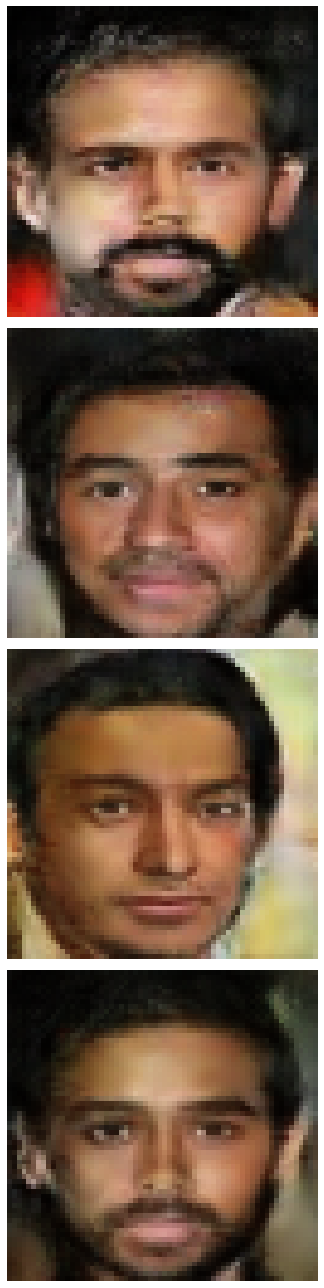

In [233]:
fig = plt.figure(figsize=(24, 18))

plt.subplot(4, 1, 1)
plt.imshow((predict_img(not_smiling_man)[0, :, :, :] * 127.5 + 127.5).astype(np.uint8))
plt.axis('off')
plt.subplot(4, 1, 2)#5)
plt.imshow((predict_img(not_smiling_man_2)[0, :, :, :] * 127.5 + 127.5).astype(np.uint8))
plt.axis('off')
plt.subplot(4, 1, 3)#9)
plt.imshow((predict_img(not_smiling_man_3)[0, :, :, :] * 127.5 + 127.5).astype(np.uint8))
plt.axis('off')
plt.subplot(4, 1, 4)#13)
plt.imshow((predict_img(avg_neutral_man)[0, :, :, :] * 127.5 + 127.5).astype(np.uint8))
plt.axis('off')
fig.tight_layout()
fig.savefig('average_neutral_man.png')

# Apply Vector Arithmetic

## Compound = average smiling woman - average neutral woman + average neutral man

In [234]:
compound = avg_smile_woman - avg_not_smile_woman + avg_neutral_man

## Use generator on resulting latent space vector
## Result is a smiling man!

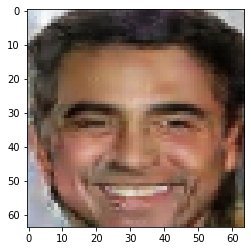

In [235]:
sample = compound.numpy()
sample = sample.reshape((1,128))
predictions = Generator(sample)
predictions = predictions.numpy()
plt.imshow((predictions[0, :, :, :] * 127.5 + 127.5).astype(np.uint8))

# Add Small Gaussian Noise To Vector and Save

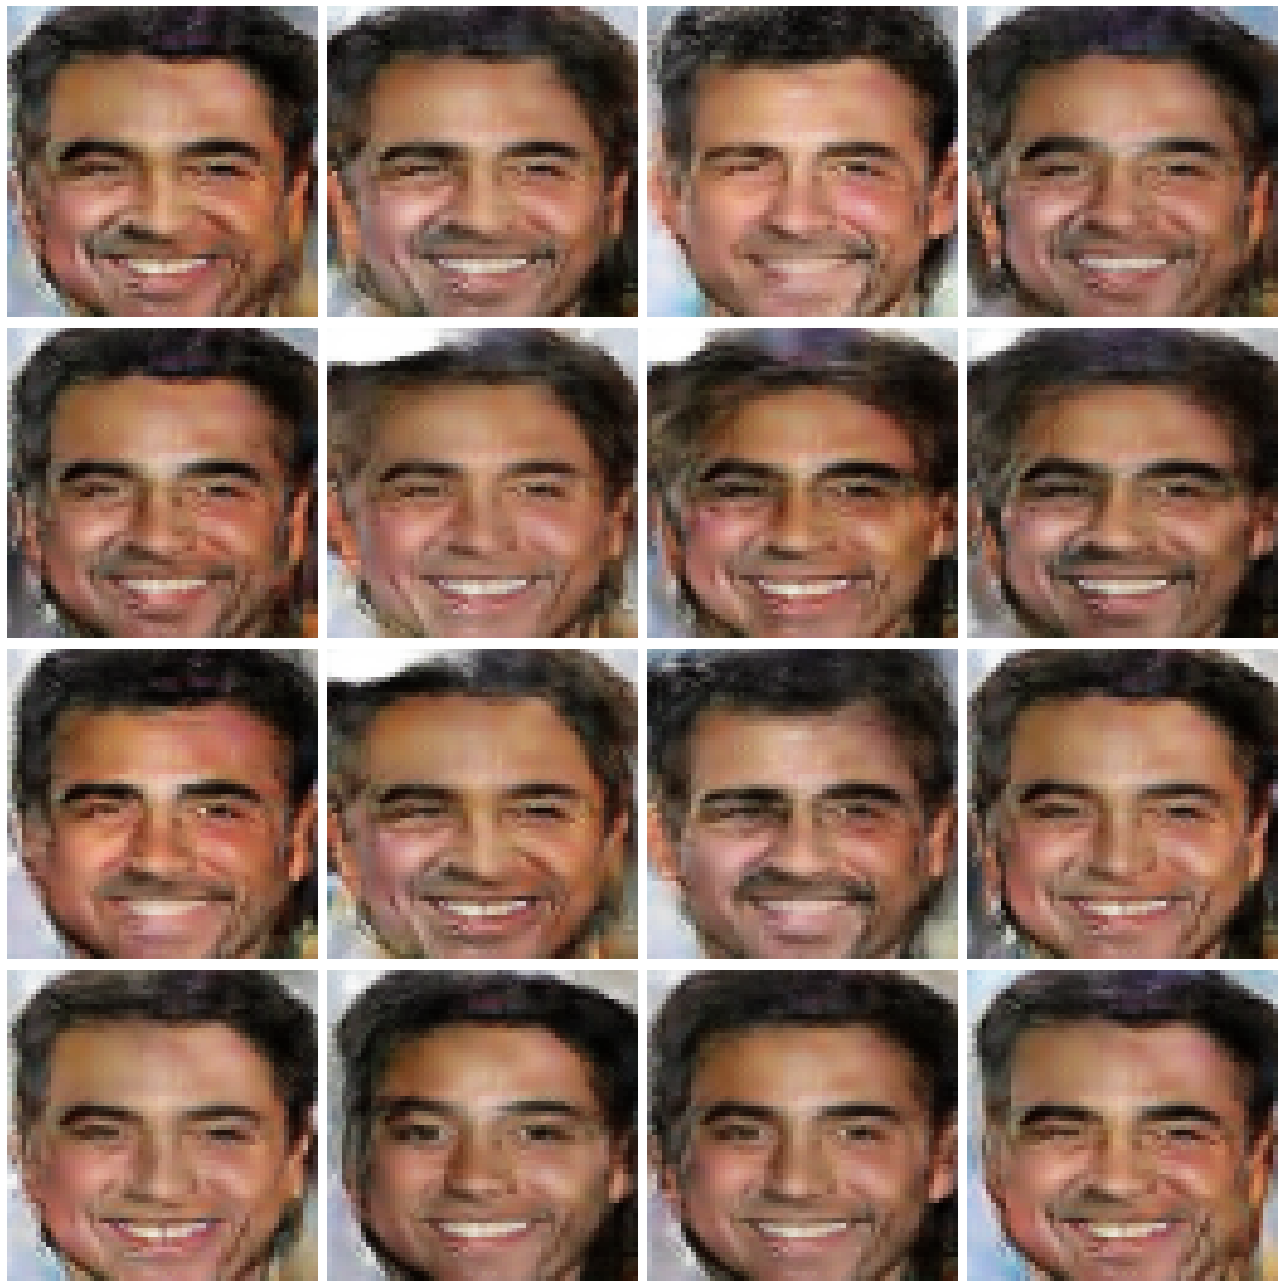

In [249]:
fig = plt.figure(figsize=(18, 18))

for i in range(16):
    plt.subplot(4, 4, i+1)
    compound_noise = compound + tf.random.normal([1, 128], stddev=0.2)
    plt.imshow((predict_img(compound_noise)[0, :, :, :] * 127.5 + 127.5).astype(np.uint8))
    plt.axis('off')
fig.tight_layout()
fig.savefig('compound_smiling_man.png')

# Sample From The Generator And Save

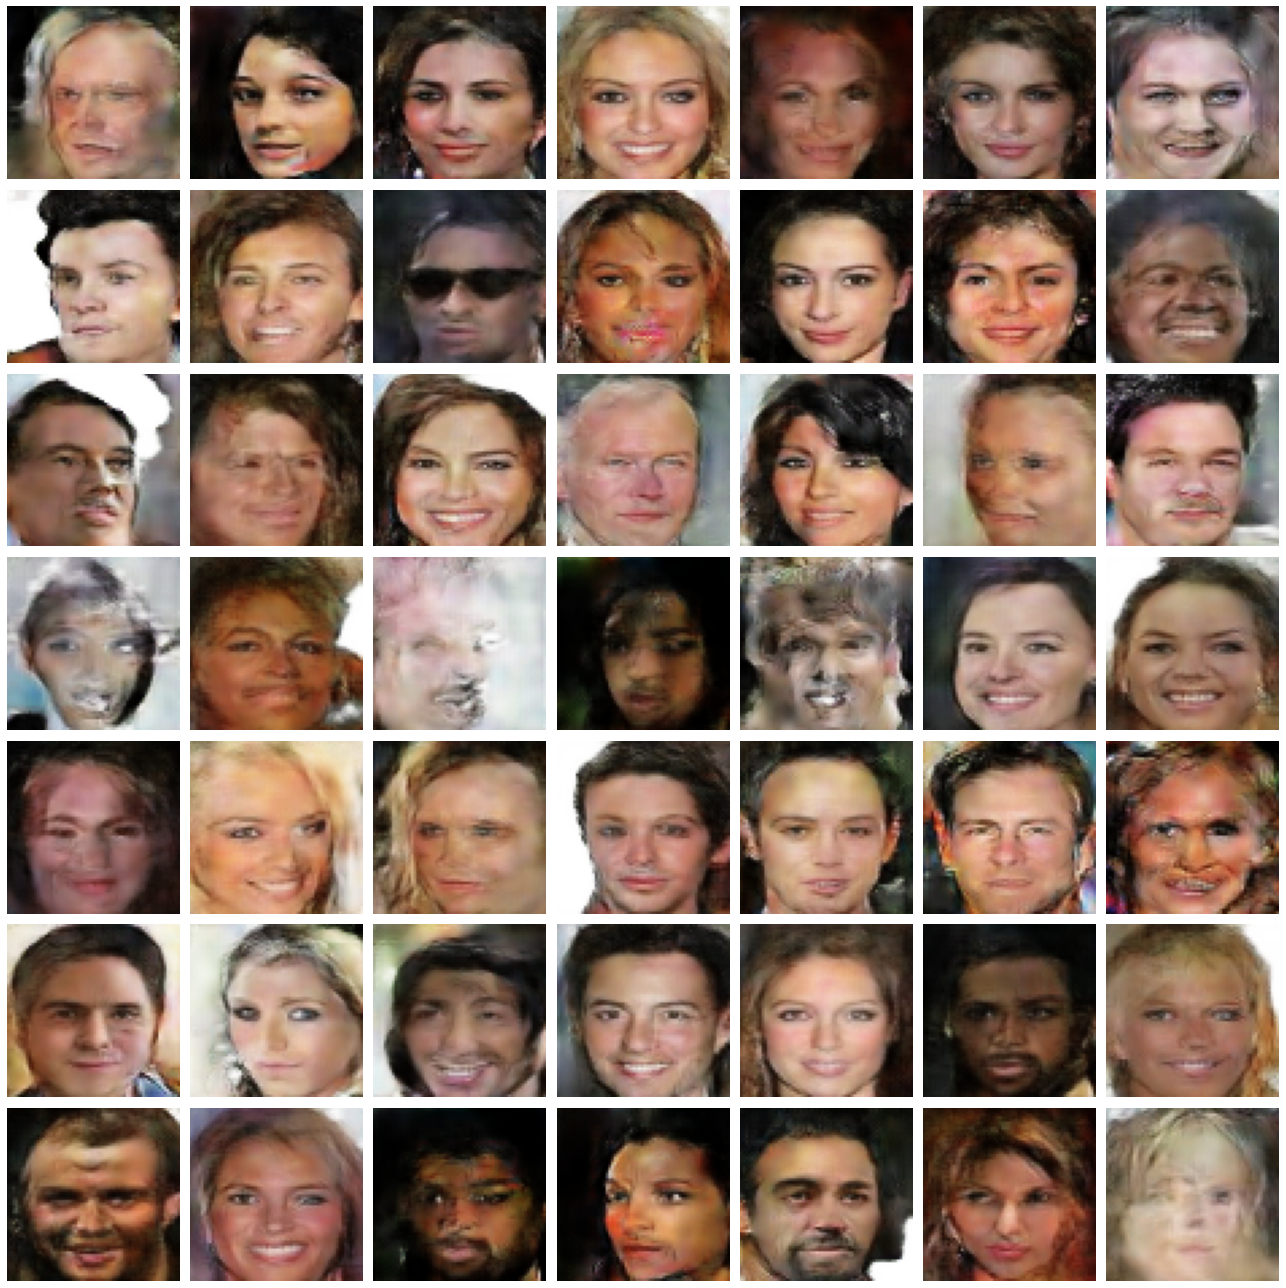

In [5]:
rand = tf.random.uniform([49, 128], minval=-1., maxval=1.)
predictions = Generator(rand)
predictions = predictions.numpy()
fig = plt.figure(figsize=(18, 18))

for i in range(predictions.shape[0]):
    plt.subplot(7, 7, i + 1)
    plt.imshow((predictions[i, :, :, :] * 127.5 + 127.5).astype(np.uint8))
    plt.axis('off')
fig.tight_layout()
fig.savefig('CelebA_facialImages_Uniform_150_epoch.png')